In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler , LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from os import system

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

from sklearn.tree import export_graphviz

from sklearn.externals.six import StringIO

import pydotplus
import graphviz
from statistics import median, mean

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score


In [57]:
data = pd.read_csv('bank-full.csv')

In [58]:
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


Basic EDA

In [59]:
data.shape

(45211, 17)

In [60]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [61]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

10 features are object, 7 are numbers

we know 10 are categorical, so lets convert them to Categorical

In [62]:
data[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 
      'Target']] = data[['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 
                         'month', 'poutcome', 'Target']].apply(pd.Categorical)

In [63]:
data.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

In [64]:
# Checking no. of missing values  
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

## No NaN values

In [65]:
data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [66]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [67]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [68]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [69]:
data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

# 5 point summary

In [70]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


## outliers are present in Age, balance, duration, campaign, pdays and previous

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

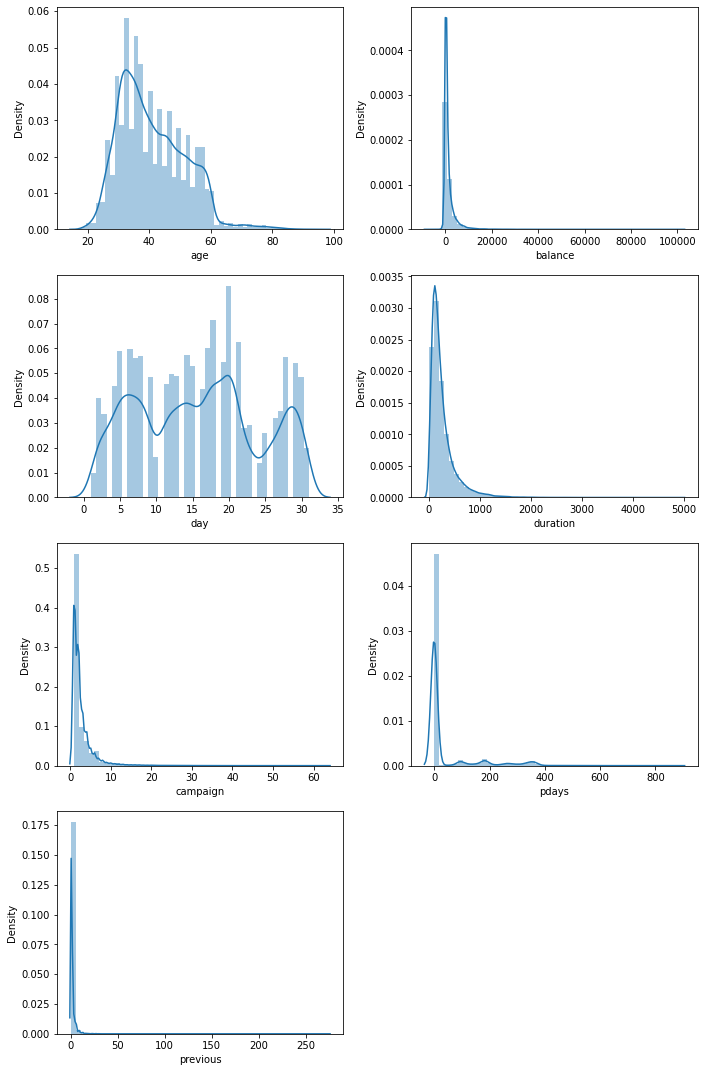

In [71]:
# Distibution of numerical values
fig, axe = plt.subplots(nrows=4, ncols=2, figsize = (10, 15))
axe = axe.flatten()
l = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i in range(len(l)):
  sns.distplot(data[l[i]], ax = axe[i])

fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

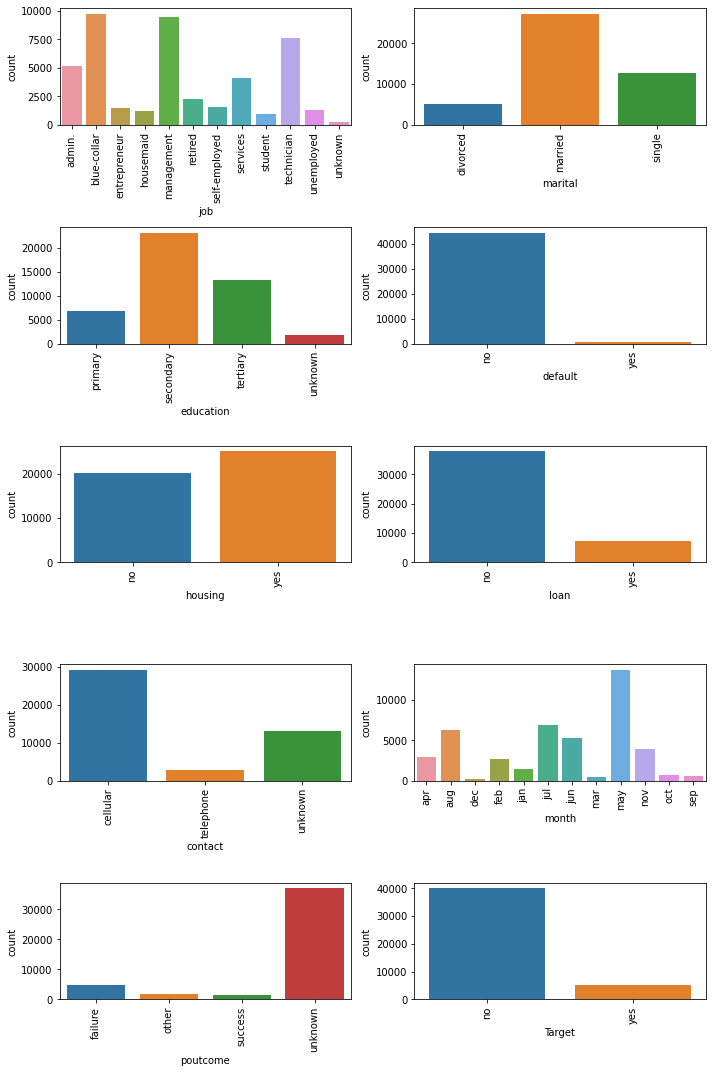

In [72]:
# Distribution of categorical features

fig, axe = plt.subplots(nrows=5, ncols=2, figsize = (10, 15))
axe = axe.flatten()

l = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']
for i in range(len(l)):
  plot = sns.countplot(x = data[l[i]], data = data, ax = axe[i])
  plt.setp(plot.get_xticklabels(), rotation = 90)

fig.tight_layout()
fig.show()

## Inferences from count plot of categorical features:

1. more than 90% customers have no default credit
2. 88% customers aren't subscribed for term deposit
3. Most customers are contacted in the month of Ma
4. Most peoplt have been contacted via cellphone
5. Number of customers who have housing loans is more than no. of customers, who don't have housing loan
6. Around 6% of customers have credit in default




Measure of skewness of numerical features

In [73]:
data.skew().to_frame('Skewness Measure')

,Skewness Measure
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


### Checking the Presence of Outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

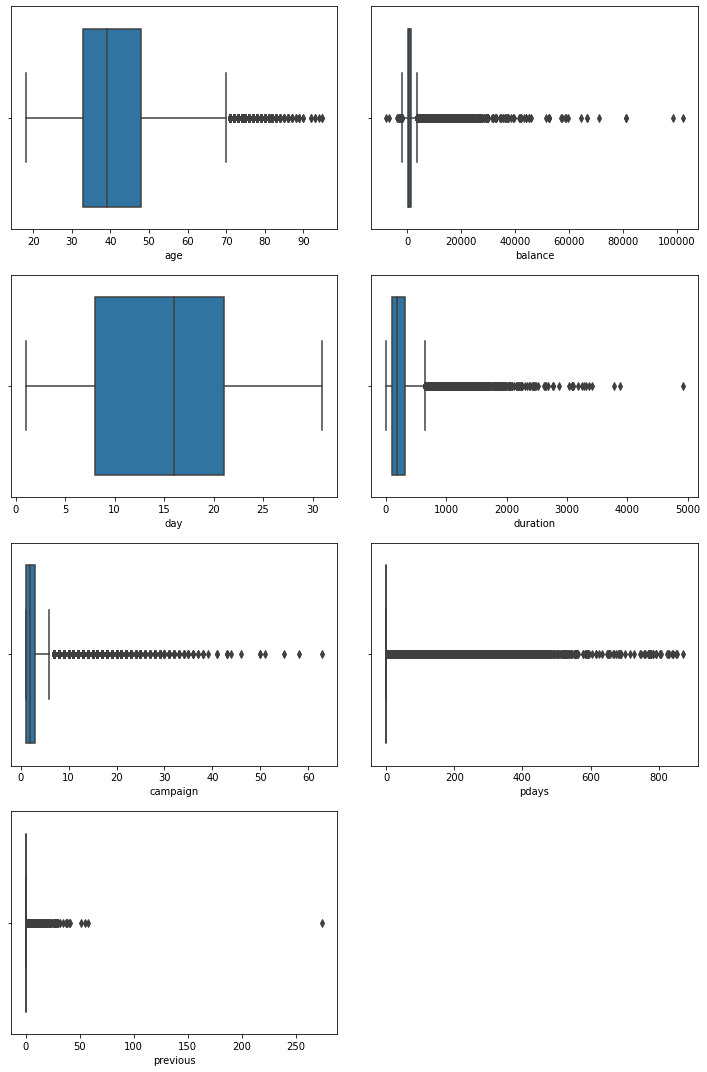

In [74]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize = (10, 15))
axe = axe.flatten()

l = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i in range(len(l)):
  sns.boxplot(data[l[i]], data=data, ax = axe[i])

fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

In [75]:
data['Target'].value_counts().to_frame('Target Feature Distribution')

,Target Feature Distribution
no,39922
yes,5289


In [76]:
df = data.copy()

In [77]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [78]:
lab_enc = LabelEncoder()

In [79]:
l = ['marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome', 'Target']

for i in l:
  df[i] = lab_enc.fit_transform(df[i]).astype(int)

In [80]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int64   
 3   education  45211 non-null  int64   
 4   default    45211 non-null  int64   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int64   
 7   loan       45211 non-null  int64   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int64   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int64   
 16  Target     45211 non-null  int64   
dtypes: category(2), int64(15)
memory usage: 5.3 MB


In [82]:
df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 
      'Target']] = df[['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 
                         'month', 'poutcome', 'Target']].apply(pd.Categorical)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


## Handling outliers with Mean Replacement

In [84]:
outlier_features = ['balance', 'duration', 'campaign', 'pdays', 'previous']

for i in outlier_features:
  mean_of_feature = float(df[i].mean())
  df[i] = np.where(df[i]>np.percentile(df[i], 75), mean_of_feature, df[i])

### Plotting the boxplot after removing the outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

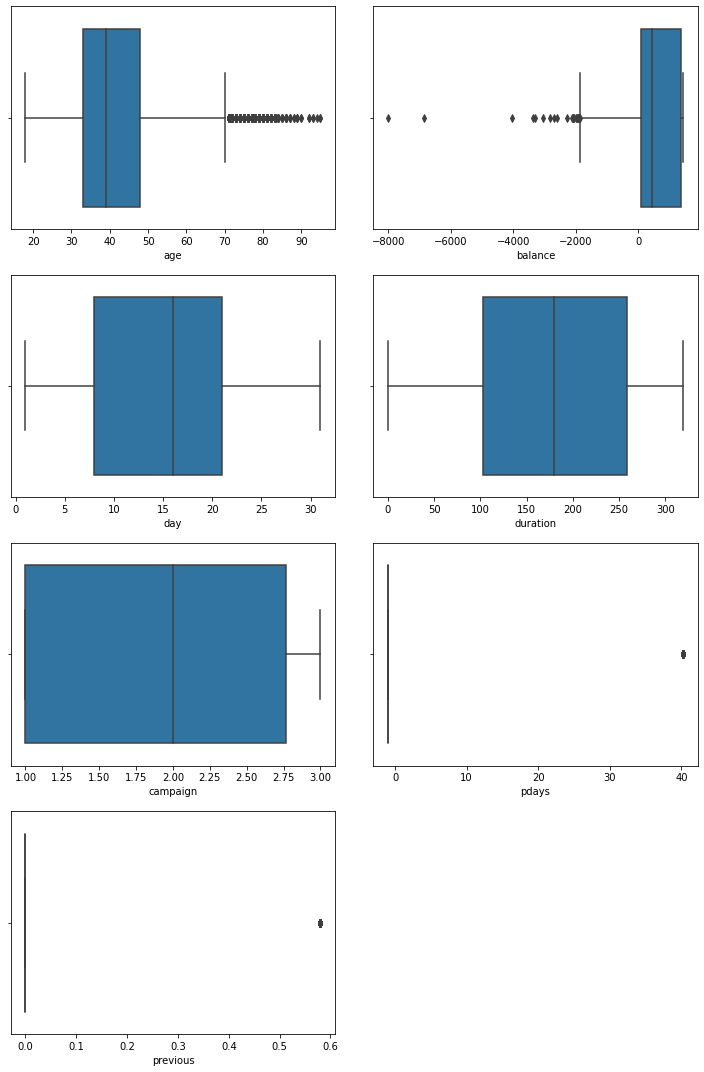

In [85]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize = (10, 15))
axe = axe.flatten()

l = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i in range(len(l)):
  sns.boxplot(df[l[i]], data=df, ax = axe[i])

fig.tight_layout()
fig.show()
axe.flat[-1].set_visible(False)

Correlation Plot of All features

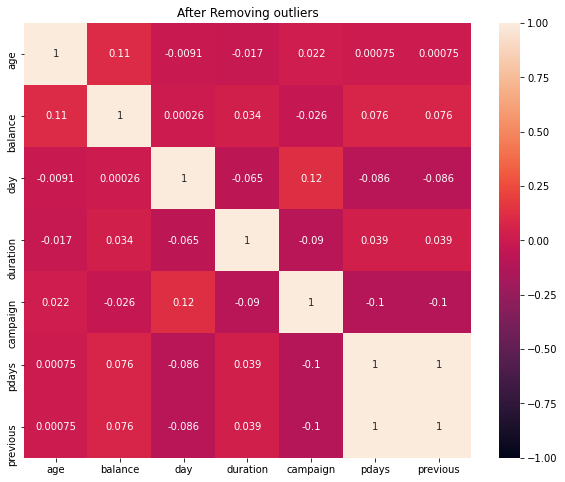

In [86]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin=-1)
plt.title('After Removing outliers');

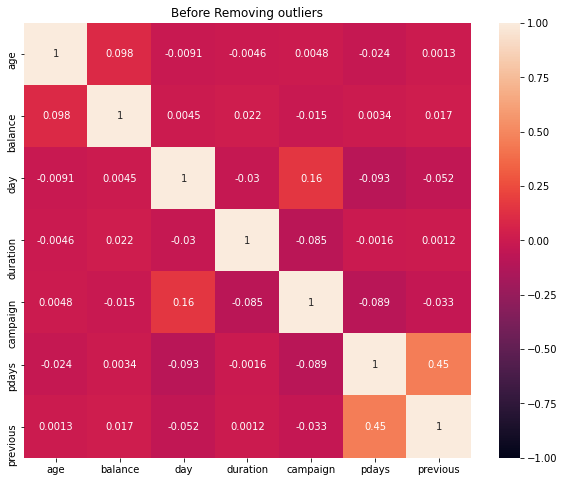

In [87]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, vmax=1, vmin=-1)
plt.title('Before Removing outliers');

In [98]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,1362.272058,1,0,unknown,5,8,261.0,1.0,-1.0,0.0,3,0
1,44,technician,2,1,0,29.000000,1,0,unknown,5,8,151.0,1.0,-1.0,0.0,3,0


In [106]:
df2 = df.drop(['job','education','contact','duration','pdays','day','month'],axis=1)
df2.head(3)

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0


# Splt Data or Training and Testing in 70:30 ratio

In [115]:
X = df2.drop('Target', axis = 1)
y = df2['Target']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [117]:
# Scaling the data
Scaler = StandardScaler()
X_train, X_test = Scaler.fit_transform(X_train), Scaler.fit_transform(X_test)

# Builing the Models

### 1. Logistic Regression

In [118]:
Logic_R = LogisticRegression(solver='liblinear')

In [174]:
# Fitting the model
Logic_R.fit(X_train, y_train)

y_pred = Logic_R.predict(X_test)

# Confusion Matrix
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

LR_Accuracy = accuracy_score(y_test, y_pred)

# Accuracy Score
print('\nAccuracy score:\n', LR_Accuracy)

# Classification Report
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Confusion Matrix:
 [[11892   107]
 [ 1318   247]]

Accuracy score:
 0.8949424948392805

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.70      0.16      0.26      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



### 2. Naive Bayes

In [132]:
NB = GaussianNB()

In [175]:
# Fitting the model
NB.fit(X_train, y_train)

y_pred = NB.predict(X_test)

# Confusion Matrix
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

NB_Accuracy = accuracy_score(y_test, y_pred)

# Accuracy Score
print('\nAccuracy score:\n', NB_Accuracy)

# Classification Report
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Confusion Matrix:
 [[10667  1332]
 [ 1055   510]]

Accuracy score:
 0.8240194632851666

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     11999
           1       0.28      0.33      0.30      1565

    accuracy                           0.82     13564
   macro avg       0.59      0.61      0.60     13564
weighted avg       0.84      0.82      0.83     13564



### 3. KNN

In [136]:
KNN = KNeighborsClassifier()

In [176]:
# Fitting the model
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

# Confusion Matrix
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

KNN_Accuracy = accuracy_score(y_test, y_pred)

# Accuracy Score
print('\nAccuracy score:\n', KNN_Accuracy)

# Classification Report
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Confusion Matrix:
 [[11665   334]
 [ 1274   291]]

Accuracy score:
 0.8814508994396933

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94     11999
           1       0.47      0.19      0.27      1565

    accuracy                           0.88     13564
   macro avg       0.68      0.58      0.60     13564
weighted avg       0.85      0.88      0.86     13564



### 4. SVC Model

In [140]:
svc = SVC()

In [177]:
# Fitting the model
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

# Confusion Matrix
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

SVC_Accuracy = accuracy_score(y_test, y_pred)

# Accuracy Score
print('\nAccuracy score:\n', SVC_Accuracy)

# Classification Report
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Confusion Matrix:
 [[11856   143]
 [ 1287   278]]

Accuracy score:
 0.8945738720141552

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.66      0.18      0.28      1565

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



### 5. Decision tree

In [148]:
DecisionTree = DecisionTreeClassifier(criterion='gini', random_state=1)

In [178]:
# Fitting the model
DecisionTree.fit(X_train, y_train)

y_pred = DecisionTree.predict(X_test)

# Confusion Matrix
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

DT_Accuracy = accuracy_score(y_test, y_pred)

# Accuracy Score
print('\nAccuracy score:\n', DT_Accuracy)

# Classification Report
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Confusion Matrix:
 [[10820  1179]
 [ 1184   381]]

Accuracy score:
 0.8257888528457682

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     11999
           1       0.24      0.24      0.24      1565

    accuracy                           0.83     13564
   macro avg       0.57      0.57      0.57     13564
weighted avg       0.83      0.83      0.83     13564



#### Feature Import Test for decision Tree

In [179]:
xvar = df2.drop('Target', axis=1)
feature_cols =  xvar.columns
feat_imp = DecisionTree.feature_importances_
feat_imp_dict = dict(zip(feature_cols, feat_imp))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by = 0, ascending=False)

,0
balance,0.444273
age,0.260087
poutcome,0.091608
campaign,0.072900
marital,0.042087
previous,0.034786
loan,0.028816
housing,0.020604
default,0.004840


### 6. Bagging Ensemble Model

In [160]:
bag = BaggingClassifier(base_estimator=DecisionTree, n_estimators=500, random_state=1)

In [180]:
# Fitting the model
bag.fit(X_train, y_train)

y_pred = bag.predict(X_test)

# Confusion Matrix
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

BAG_Accuracy = accuracy_score(y_test, y_pred)

# Accuracy Score
print('\nAccuracy score:\n', BAG_Accuracy)

# Classification Report
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Confusion Matrix:
 [[11549   450]
 [ 1231   334]]

Accuracy score:
 0.8760690061928634

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.43      0.21      0.28      1565

    accuracy                           0.88     13564
   macro avg       0.66      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564



### 7. Adaptive Boost Ensemble

In [164]:
ada = AdaBoostClassifier(base_estimator=DecisionTree, n_estimators=500, random_state=1)

In [181]:
# Fitting the model
ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

# Confusion Matrix
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

ADA_Accuracy = accuracy_score(y_test, y_pred)

# Accuracy Score
print('\nAccuracy score:\n', ADA_Accuracy)

# Classification Report
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Confusion Matrix:
 [[11213   786]
 [ 1203   362]]

Accuracy score:
 0.853361840165143

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92     11999
           1       0.32      0.23      0.27      1565

    accuracy                           0.85     13564
   macro avg       0.61      0.58      0.59     13564
weighted avg       0.84      0.85      0.84     13564



### 8. Random Forest

In [166]:
RandomF = RandomForestClassifier(n_estimators=500, random_state=1, max_features=3)

In [182]:
# Fitting the model
RandomF.fit(X_train, y_train)

y_pred = RandomF.predict(X_test)

# Confusion Matrix
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

RF_Accuracy = accuracy_score(y_test, y_pred)

# Accuracy Score
print('\nAccuracy score:\n', RF_Accuracy)

# Classification Report
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Confusion Matrix:
 [[11527   472]
 [ 1227   338]]

Accuracy score:
 0.8747419640224122

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     11999
           1       0.42      0.22      0.28      1565

    accuracy                           0.87     13564
   macro avg       0.66      0.59      0.61     13564
weighted avg       0.85      0.87      0.86     13564



### 9. Gradient Boost Ensemble

In [183]:
Grad_Boost = GradientBoostingClassifier(n_estimators=100, random_state=2)

In [184]:
# Fitting the model
Grad_Boost.fit(X_train, y_train)

y_pred = Grad_Boost.predict(X_test)

# Confusion Matrix
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

GB_Accuracy = accuracy_score(y_test, y_pred)

# Accuracy Score
print('\nAccuracy score:\n', GB_Accuracy)

# Classification Report
print('\nClassification Report:\n', classification_report(y_test, y_pred))


Confusion Matrix:
 [[11901    98]
 [ 1331   234]]

Accuracy score:
 0.8946475965791801

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11999
           1       0.70      0.15      0.25      1565

    accuracy                           0.89     13564
   macro avg       0.80      0.57      0.60     13564
weighted avg       0.88      0.89      0.86     13564



# Model With Accuracy Sources:

In [193]:
scores = [("Logistic Regression", LR_Accuracy), 
          ("Naive Bayes", NB_Accuracy),
          ("KNN", KNN_Accuracy),
          ("SVC", SVC_Accuracy),
          ("Decision Tree", DT_Accuracy),
          ("Bagging", BAG_Accuracy),
          ("Adaboost", ADA_Accuracy),
          ("Random Forest", RF_Accuracy),
          ("Gradient Boosting", GB_Accuracy)]

In [194]:
scores = pd.DataFrame(scores, columns=['Model', 'Accuracy Score'])

In [223]:
print("Current Scores, with Outliers replaced with mean:\n\n\n")
sorted_scores = scores.sort_values(by='Accuracy Score', ascending=False)
sorted_scores

Current Scores, with Outliers replaced with mean:





,Model,Accuracy Score
0,Logistic Regression,0.894942
8,Gradient Boosting,0.894648
3,SVC,0.894574
2,KNN,0.881451
5,Bagging,0.876069
7,Random Forest,0.874742
6,Adaboost,0.853362
4,Decision Tree,0.825789
1,Naive Bayes,0.824019


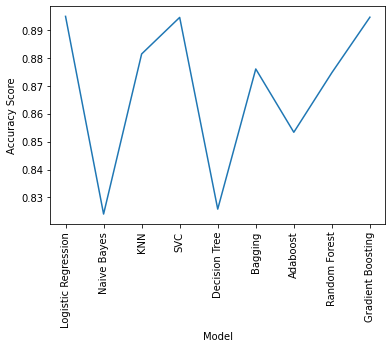

In [226]:
sns.lineplot(x=scores['Model'],y=scores['Accuracy Score'],data=scores,markers=True, dashes=False) #Countplot of Scores
plt.xticks(rotation=90)
plt.show();